<a href="https://colab.research.google.com/github/muralipamarthi/EDA/blob/main/22BDS0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/SuicideChina.csv"
df = pd.read_csv(url)

df.head()

,rownames,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [ ]:
df.tail()

,rownames,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide
2570,2571,2571,yes,no,unknown,2010,7,female,44,primary,farming,Pesticide


In [ ]:
print("Dimensions (rows, columns):", df.shape)

Dimensions (rows, columns): (2571, 12)


In [ ]:
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))


=== Summary Statistics ===
           rownames    Person_ID Hospitalised  Died Urban         Year  \
count   2571.000000  2571.000000         2571  2571  2571  2571.000000   
unique          NaN          NaN            2     2     3          NaN   
top             NaN          NaN          yes    no    no          NaN   
freq            NaN          NaN         1553  1315  2213          NaN   
mean    1286.000000  1286.000000          NaN   NaN   NaN  2010.045508   
std      742.328095   742.328095          NaN   NaN   NaN     0.791412   
min        1.000000     1.000000          NaN   NaN   NaN  2009.000000   
25%      643.500000   643.500000          NaN   NaN   NaN  2009.000000   
50%     1286.000000  1286.000000          NaN   NaN   NaN  2010.000000   
75%     1928.500000  1928.500000          NaN   NaN   NaN  2011.000000   
max     2571.000000  2571.000000          NaN   NaN   NaN  2011.000000   

              Month     Sex          Age  Education Occupation     method  
count  

In [ ]:
#finding data types
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames         int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object


In [ ]:
#finding missing values
Missing_Values =df.isnull().sum()
print(Missing_Values)

rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64


In [ ]:
#counting no of unique values
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 rownames        2571
Person_ID       2571
Hospitalised       2
Died               2
Urban              3
Year               3
Month             12
Sex                2
Age               87
Education          5
Occupation        10
method             9
dtype: int64


In [ ]:
#To fill missing values with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

There are no missing values in the data set to fill with mode

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

There are no duplicate values to remove

In [103]:
#mean median and mode for all numerical columns
print("\n=== Mean, Median, Mode for Numerical Columns ===")

num_cols_filtered = [col for col in num_cols if col not in ["rownames", "Person_ID"]]

for col in num_cols_filtered:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = list(df[col].mode())
    print(f"\nColumn: {col}")
    print(f"  Mean  : {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode  : {mode_val}")



=== Mean, Median, Mode for Numerical Columns ===

Column: Year
  Mean  : 2010.0455075845975
  Median: 2010.0
  Mode  : [2010]

Column: Month
  Mean  : 6.298327499027616
  Median: 6.0
  Mode  : [6]

Column: Age
  Mean  : 52.63088292493193
  Median: 53.0
  Mode  : [40]


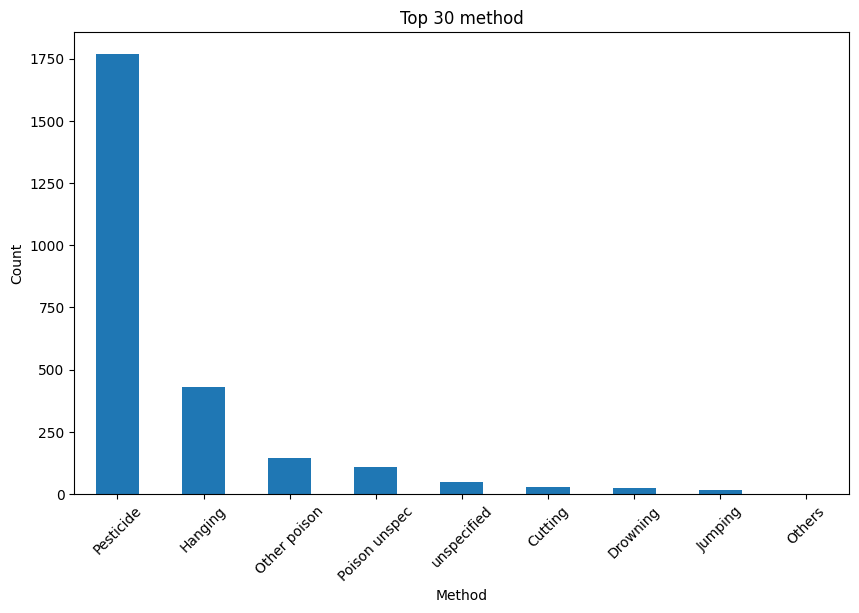

In [ ]:
#univariate analysis
col = "method"
df[col].value_counts().nlargest(30).plot(kind='bar', figsize=(10, 6))
plt.title(f"Top 30 {col}")
plt.ylabel("Count")
plt.xlabel(col.capitalize())
plt.xticks(rotation=45)
plt.show()


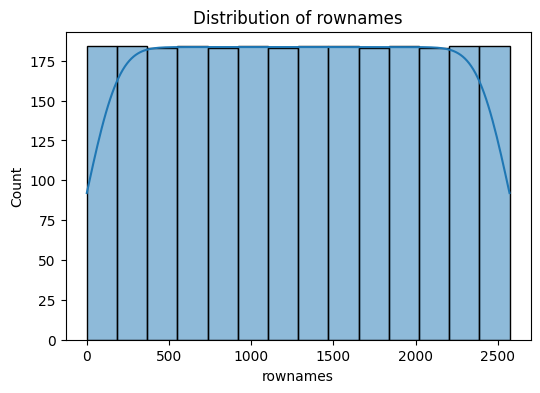

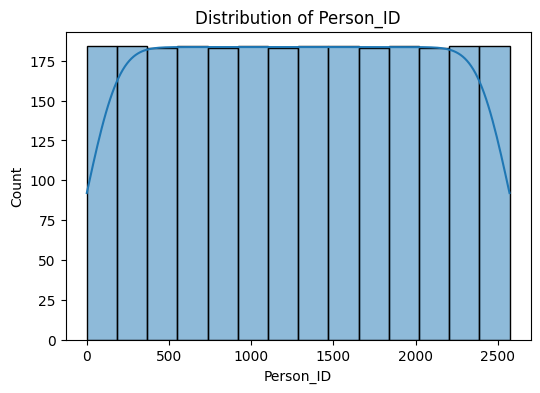

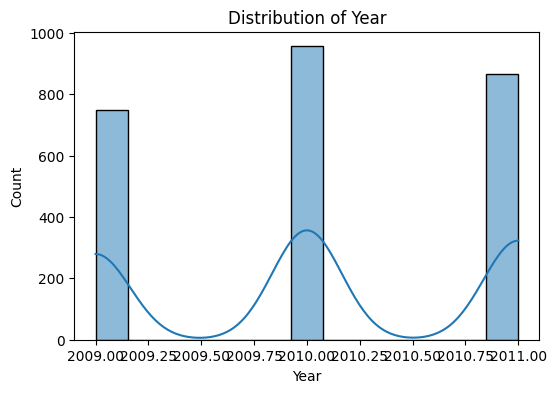

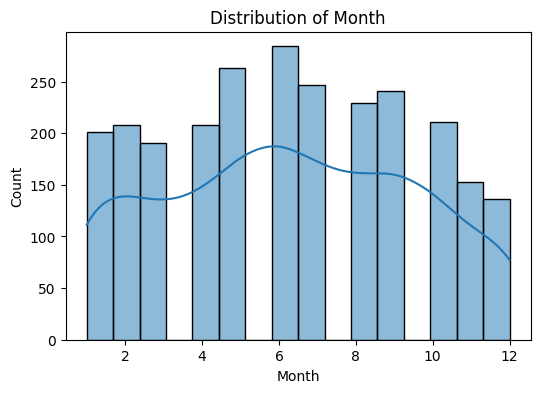

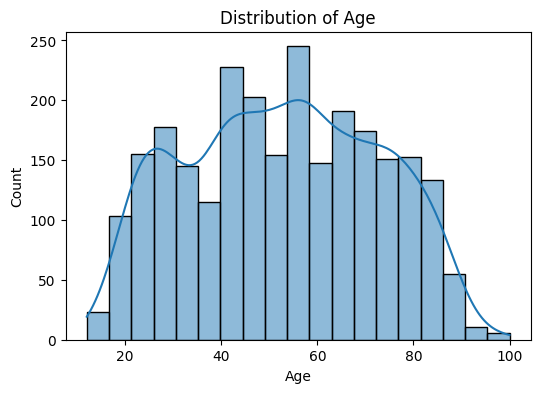

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

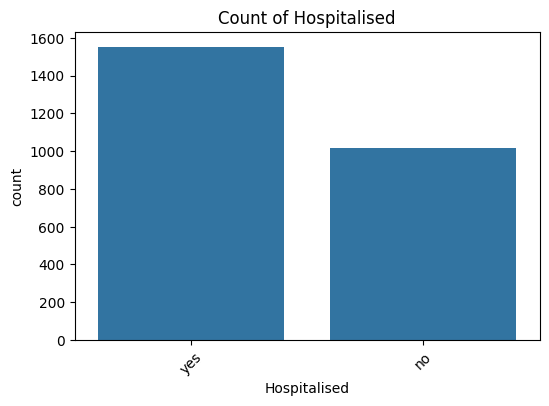

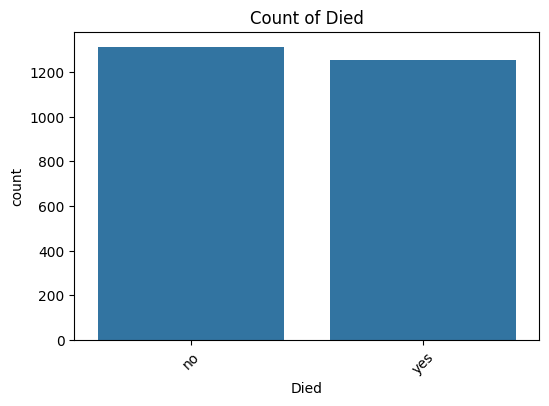

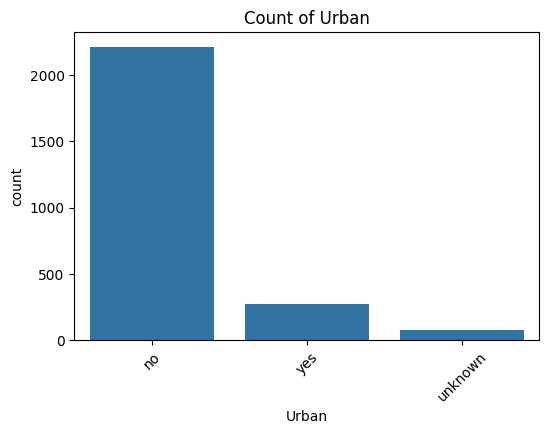

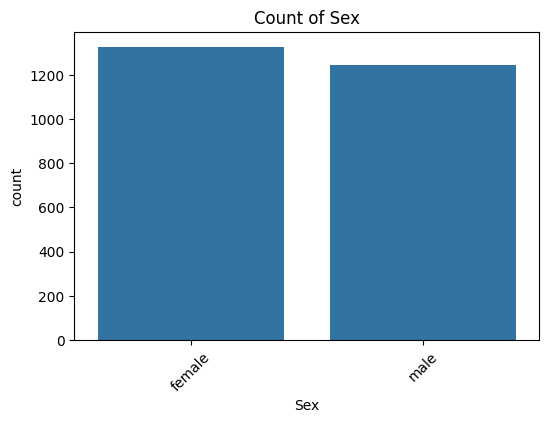

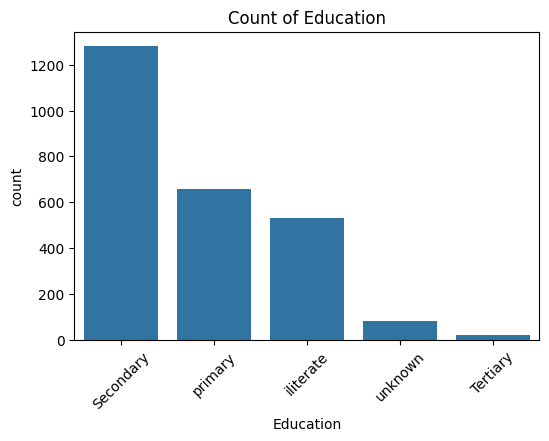

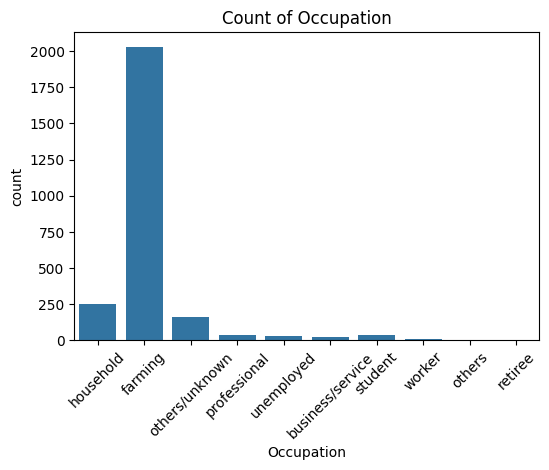

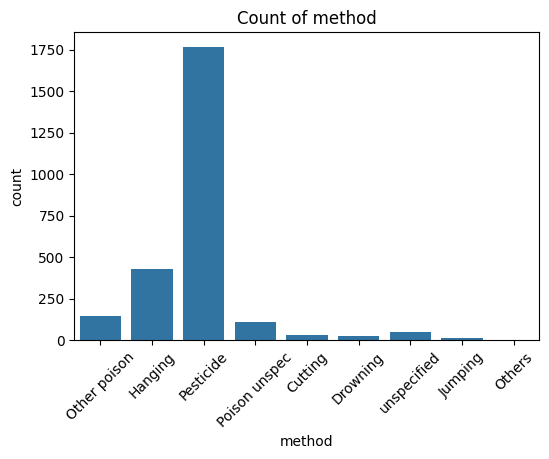

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

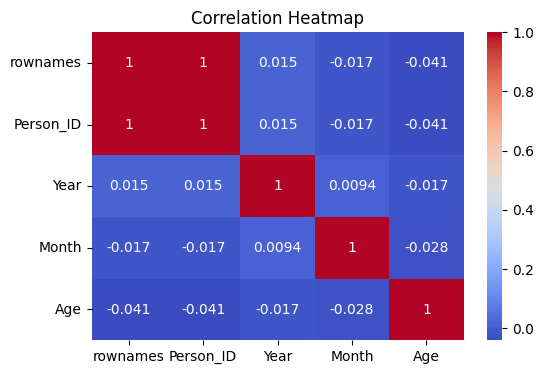

In [ ]:
#Bivariate analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

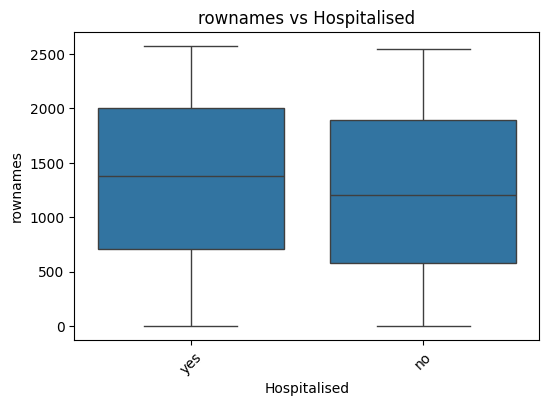

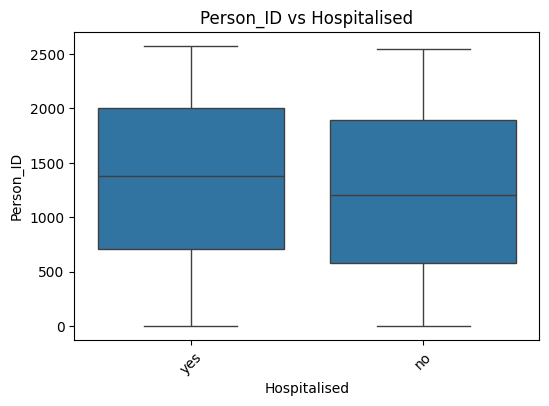

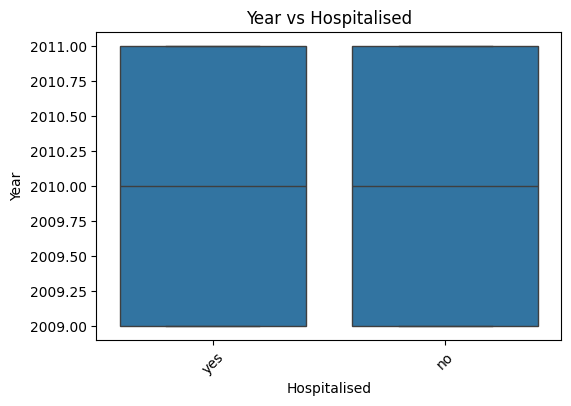

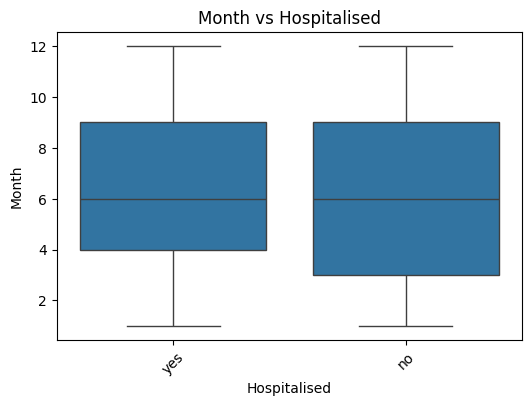

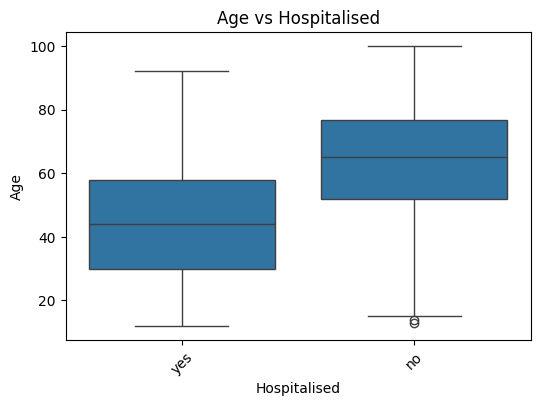

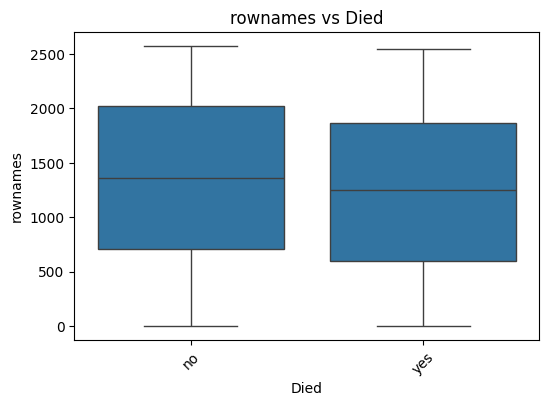

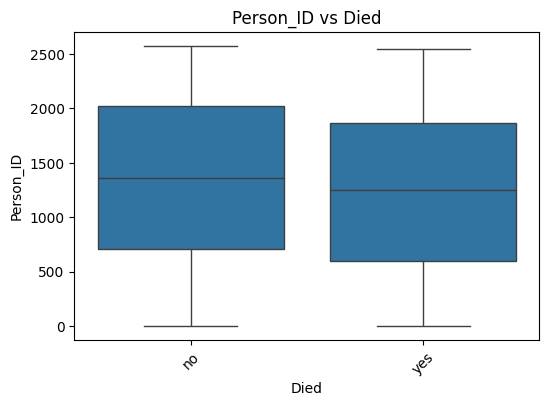

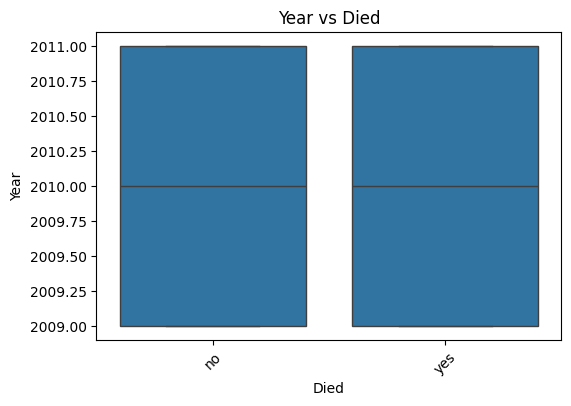

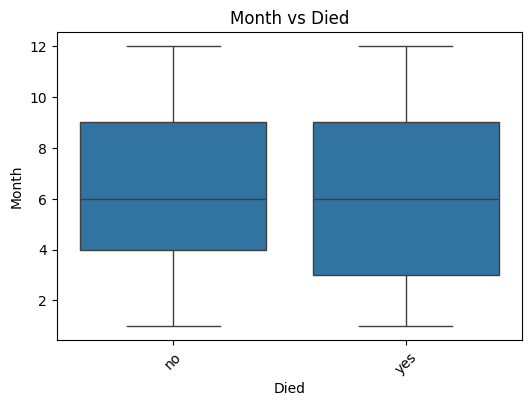

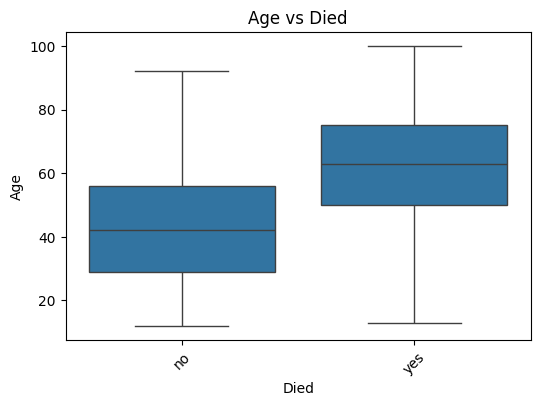

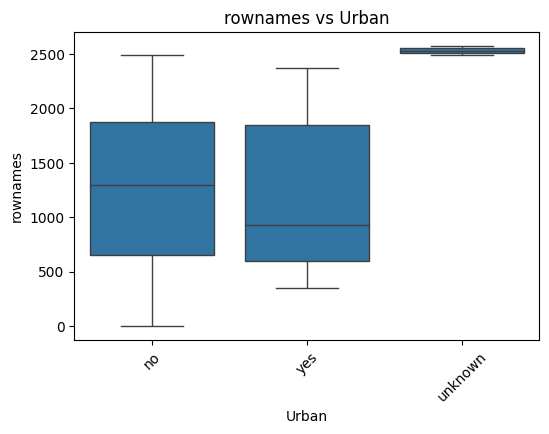

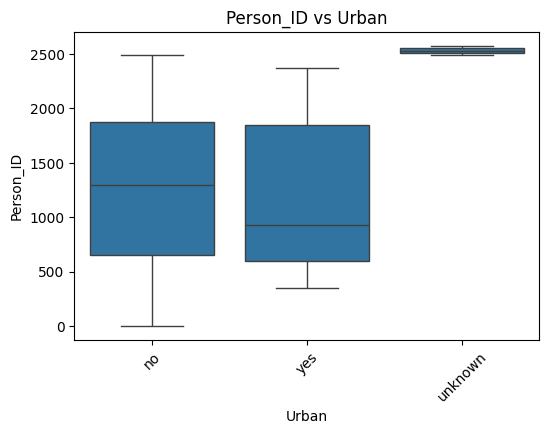

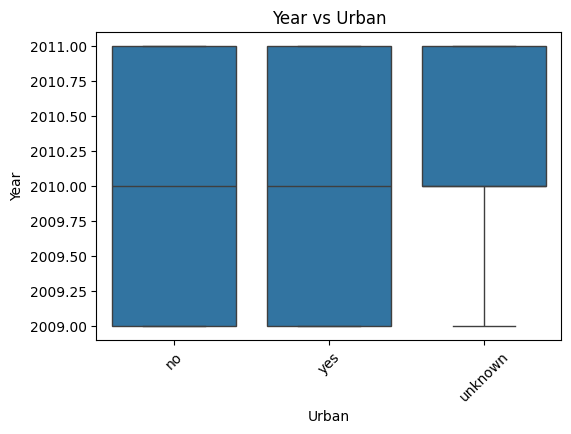

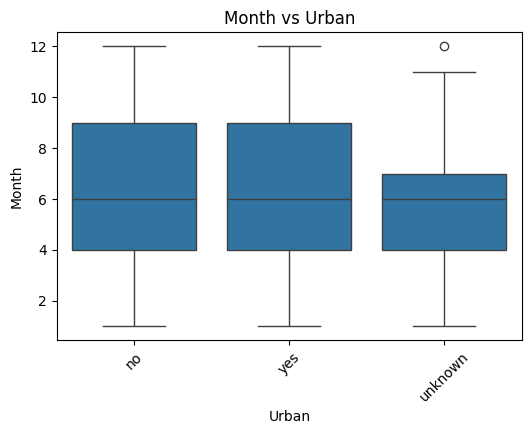

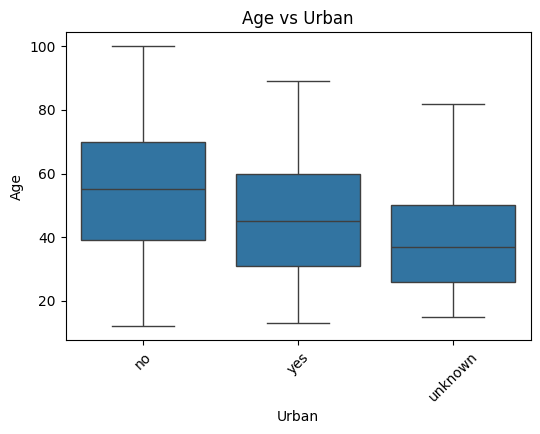

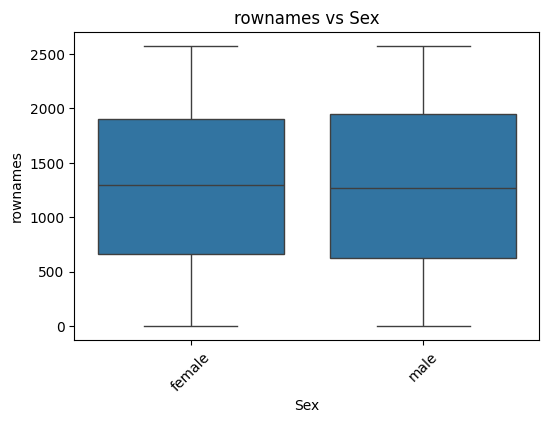

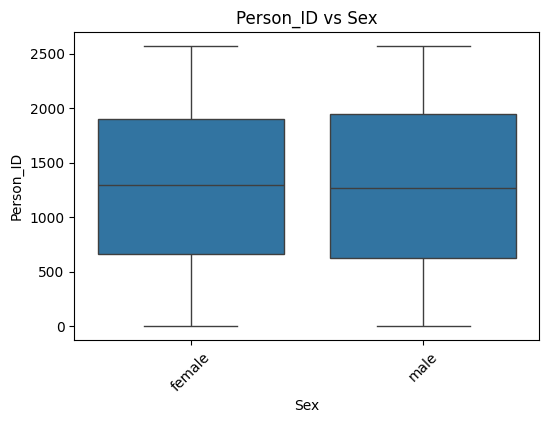

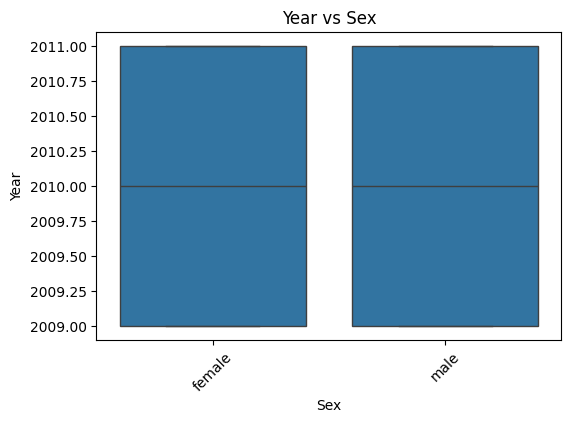

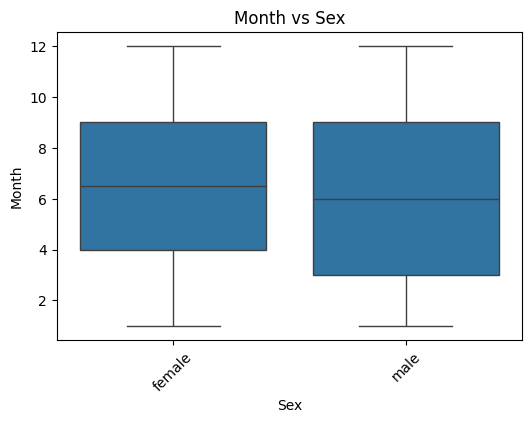

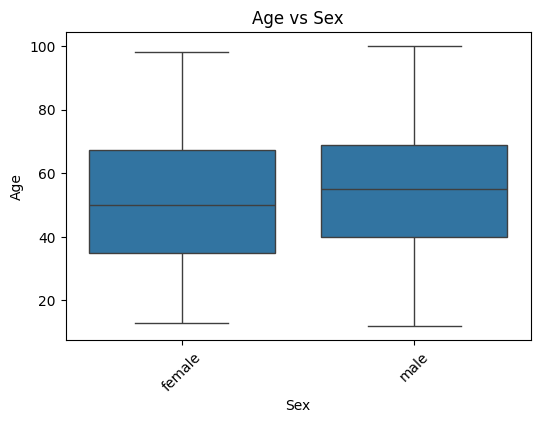

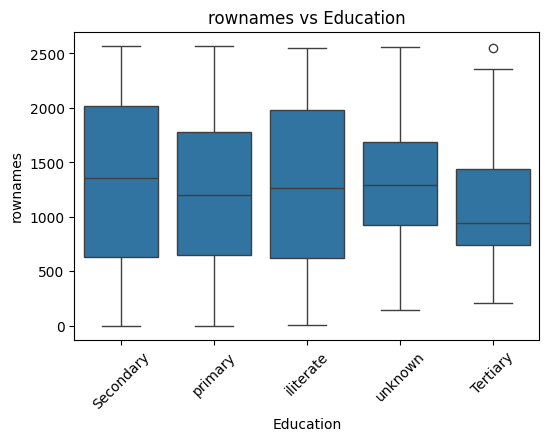

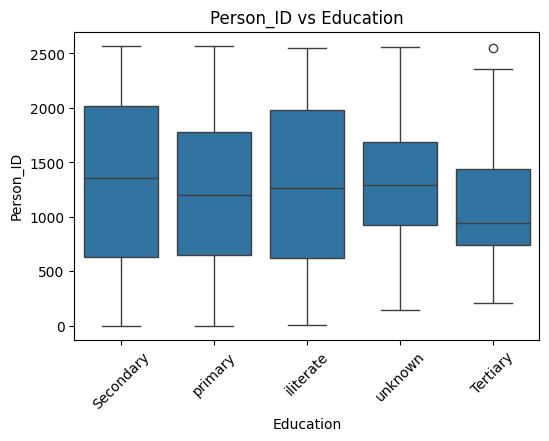

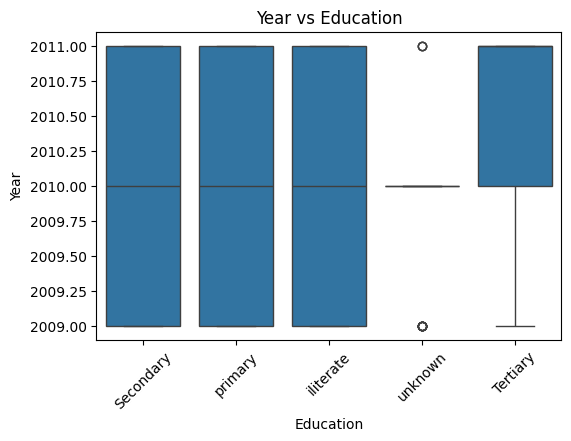

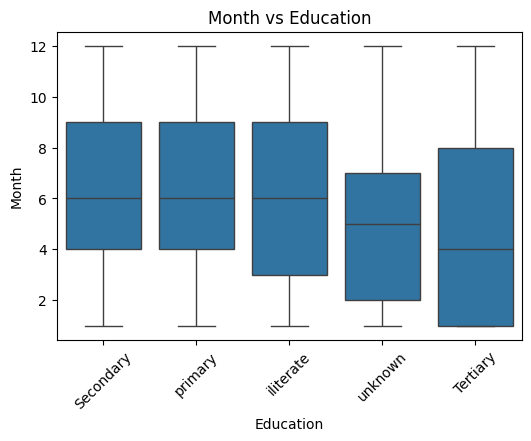

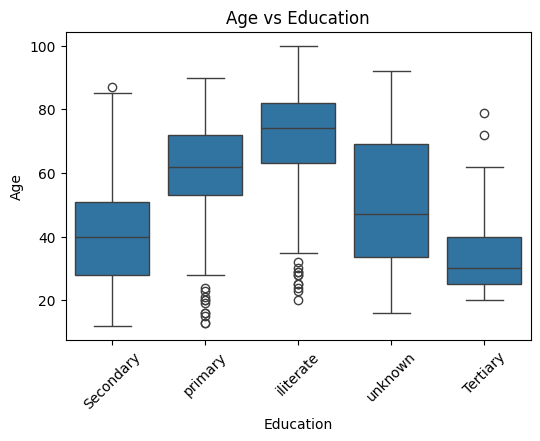

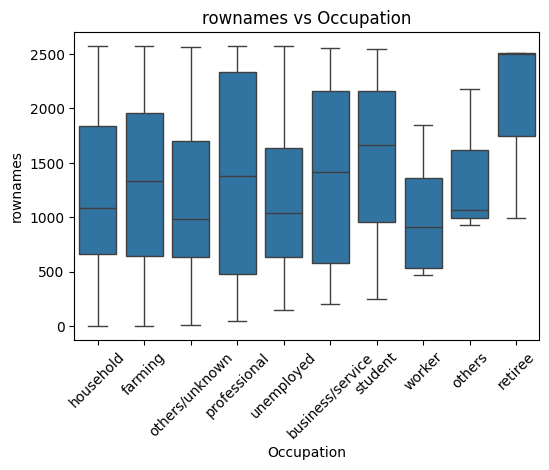

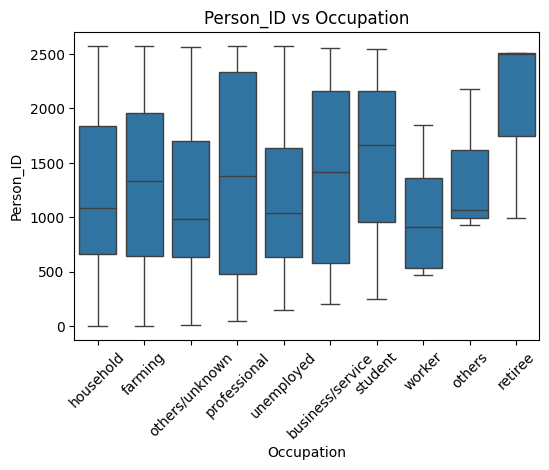

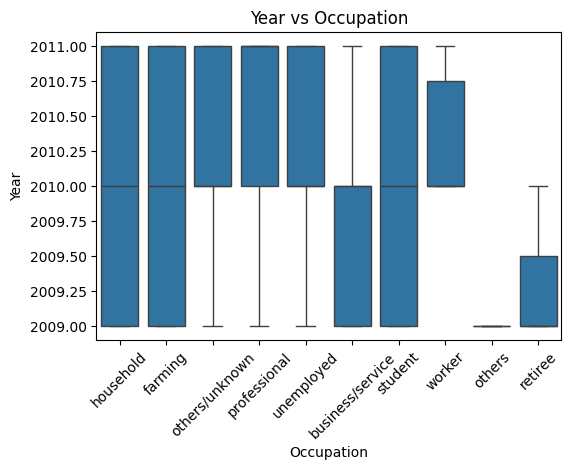

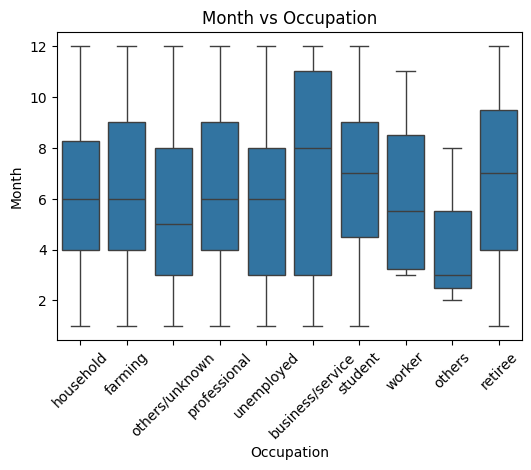

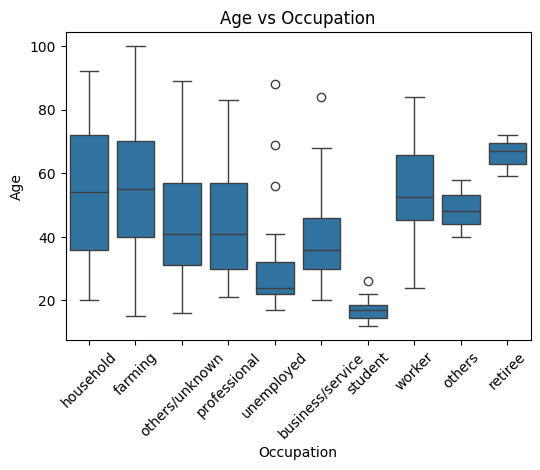

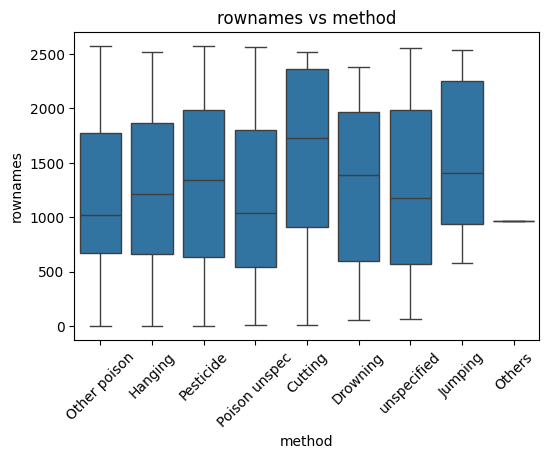

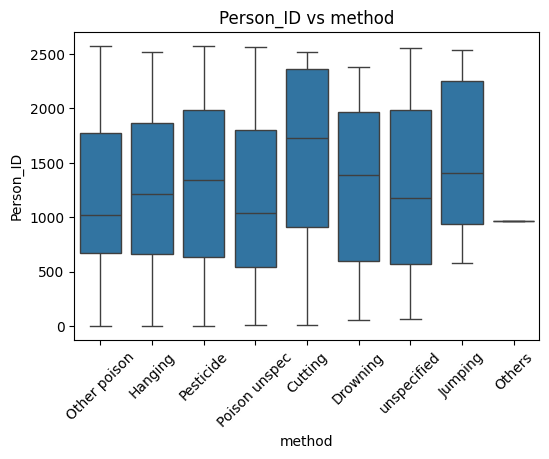

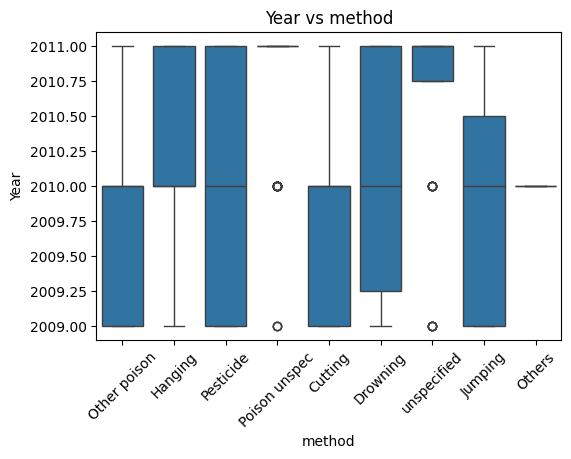

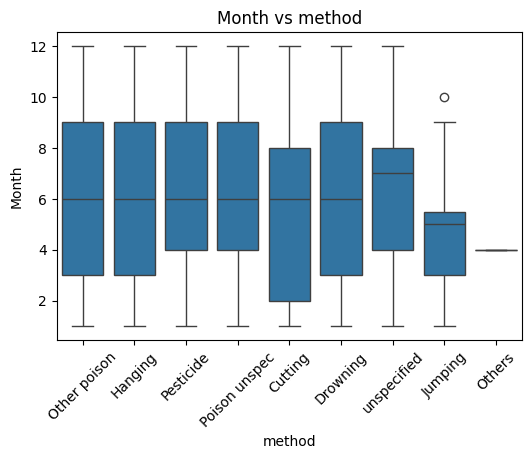

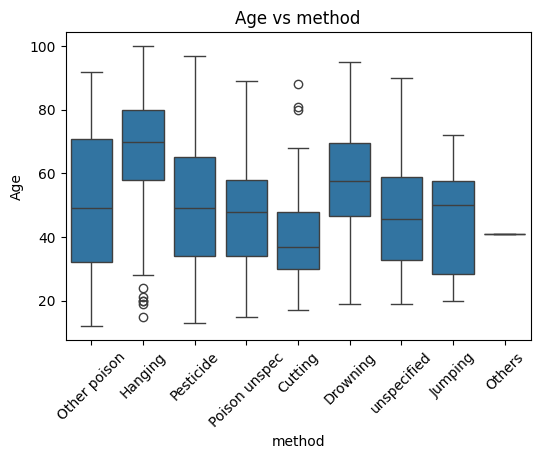

In [ ]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col, y=num)
        plt.title(f"{num} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    grouped = df.groupby(cat_cols[0])[num_cols].mean()
    print("\nGroup-wise Mean:\n", grouped)


Group-wise Mean:
                  rownames    Person_ID         Year     Month        Age
Hospitalised                                                            
no            1220.502947  1220.502947  2010.060904  6.231827  62.973477
yes           1328.933677  1328.933677  2010.035415  6.341919  45.851256


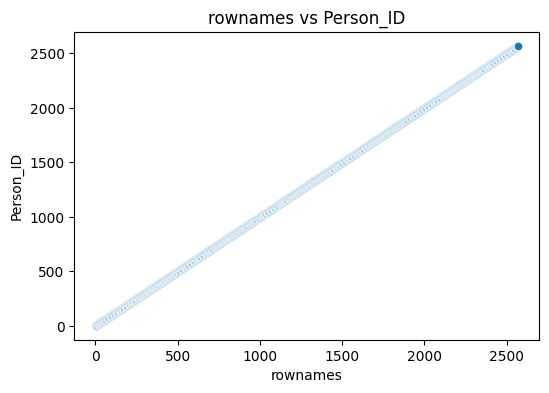

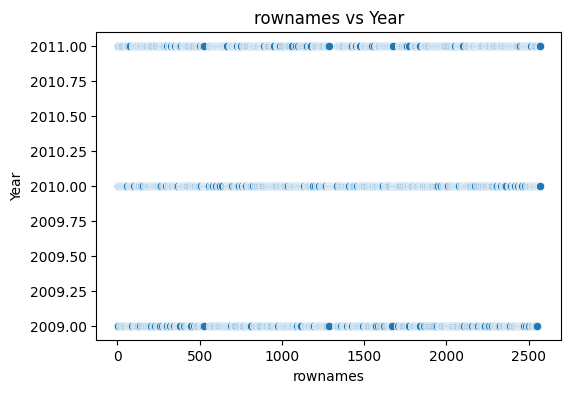

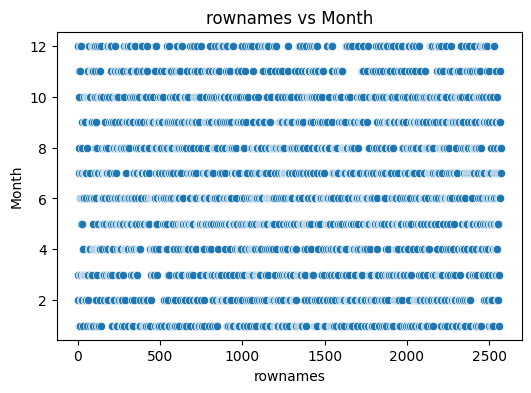

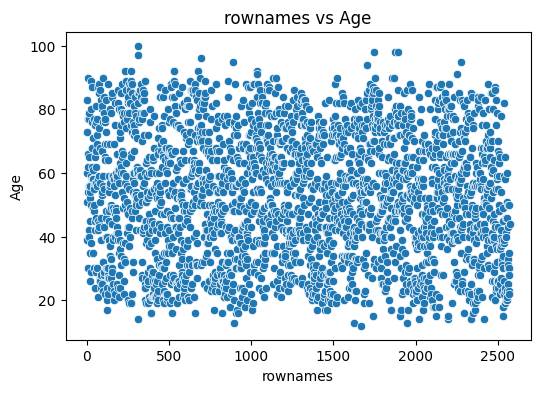

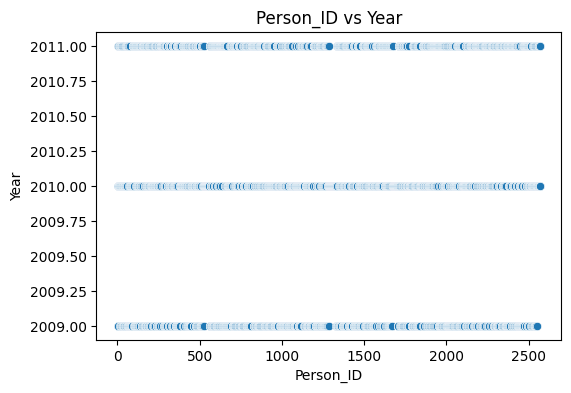

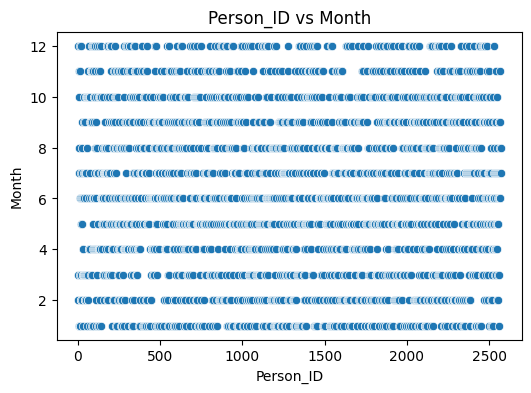

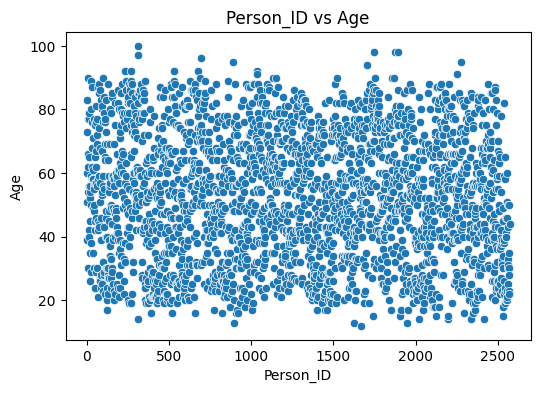

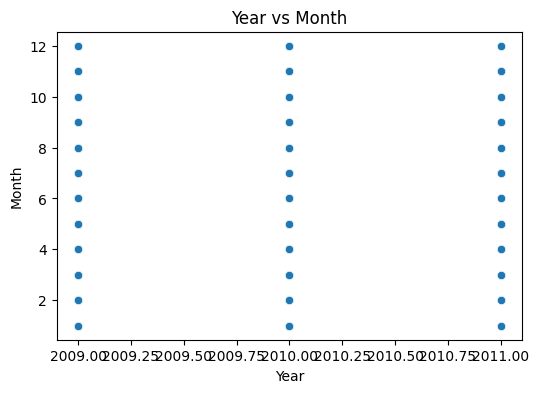

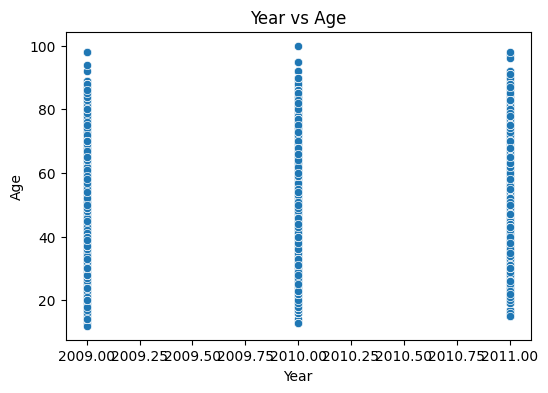

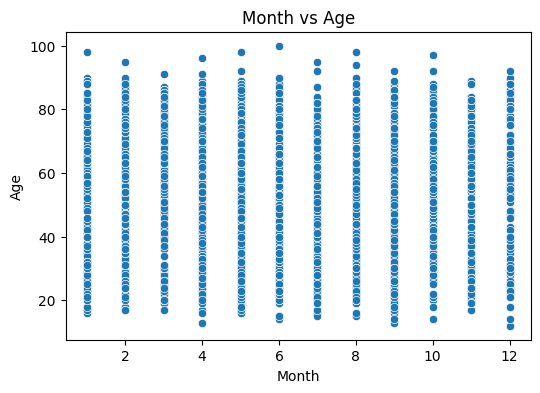

In [ ]:
from itertools import combinations

num_pairs = list(combinations(num_cols, 2))  # All unique column pairs

for col_x, col_y in num_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col_x, y=col_y)
    plt.title(f"{col_x} vs {col_y}")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

In [ ]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    grouped = df.groupby(cat_cols[0])[num_cols].mean()
    print("\nGroup-wise Mean:\n", grouped)


Group-wise Mean:
                  rownames    Person_ID         Year     Month        Age
Hospitalised                                                            
no            1220.502947  1220.502947  2010.060904  6.231827  62.973477
yes           1328.933677  1328.933677  2010.035415  6.341919  45.851256
